In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/pdf'

/content/gdrive/My Drive/pdf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
import cv2

In [ ]:
image = cv2.imread('/content/gdrive/My Drive/pdf/images/graph2.jpg')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [ ]:
# Dilate with horizontal kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,10))
dilate = cv2.dilate(thresh, kernel, iterations=0)

In [ ]:
# Find contours and remove non-diagram contours
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    if w/h > 2 and area > 10000:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

In [ ]:
# Iterate through diagram contours and form single bounding box

boxes = []
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    boxes.append([x,y, x+w,y+h])


In [ ]:
boxes = np.asarray(boxes)
x = np.min(boxes[:,0])
y = np.min(boxes[:,1])
w = np.max(boxes[:,2]) - x
h = np.max(boxes[:,3]) - y

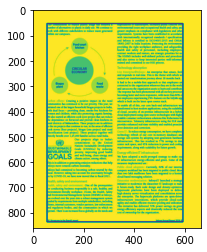

In [ ]:
# Extract ROI
cv2.rectangle(gray, (x,y), (x + w,y + h), (36,255,12), 3)
ROI = original[y:y+h, x:x+w]
plt.imshow(gray)


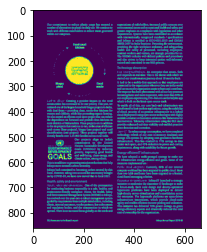

In [ ]:
plt.imshow(thresh)


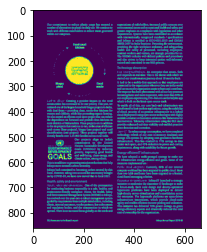

In [ ]:
plt.imshow(dilate)


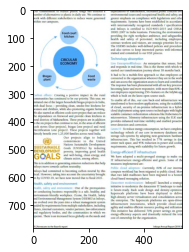

In [ ]:
plt.imshow(ROI)


In [ ]:
#!pip install fitz
#!pip install PyMuPDF


In [ ]:
import cv2 
from matplotlib import pyplot as plt 

# Opening image 
img = cv2.imread("/content/gdrive/My Drive/pdf/images/stop_board.jpg") 

# OpenCV opens images as BRG 
# but we want it as RGB We'll 
# also need a grayscale version 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 


# Use minSize because for not 
# bothering with extra-small 
# dots that would look like STOP signs 
stop_data = cv2.CascadeClassifier('stop_data.xml') 

found = stop_data.detectMultiScale(img_rgb,minSize =(20, 20)) 

# Don't do anything if there's 
# no sign 
amount_found = len(found) 

if amount_found != 0: 
	
	# There may be more than one 
	# sign in the image 
	for (x, y, width, height) in found: 
		
		# We draw a green rectangle around 
		# every recognized sign 
		cv2.rectangle(img_rgb, (x, y), 
					(x + height, y + width), 
					(0, 255, 0), 5) 
		
# Creates the environment of 
# the picture and shows it 
plt.subplot(1, 1, 1) 
plt.imshow(img_rgb) 
plt.show() 


error: ignored

In [ ]:
import fitz
doc = fitz.open("/content/gdrive/My Drive/pdf/infosys-ar-20.pdf")

In [ ]:
# pdf2svg

In [ ]:
#!git clone 'https://github.com/madureira/pdf2svg.git'
%cd '/content/gdrive/My Drive/pdf/graph_getting/pdf2svg/'

!python main.py


#!apt-get install pdf2svg

!pdf2svg 'INFOSYSAR20.pdf' 'shubham3.svg' 18

!python -m fitz embed-info 'Natural Language processing _ Intelligent text analytics with summarisation and contextualisation.pdf'

#!python -m fitz extract 'infosys-ar-20.pdf' \
#                        -images \
#                        -output graph_getting

!git clone 'https://github.com/peterstangl/svg2data.git'
from svg2data import svg2data
%matplotlib inline



In [ ]:
# annotation approach

In [ ]:
import sys
import PyPDF2, traceback

#try :
#    src = sys.argv[1]
#except :
src = r'infosys-ar-20.pdf'


input1 = PyPDF2.PdfFileReader(open(src, "rb"))
nPages = input1.getNumPages()

for i in range(nPages) :
  page0 = input1.getPage(i)
  print(i,page0)
  continue
  if page0['/Annots'] in page0:
    print('yes')
  else:
    print('no')
  try :
    for annot in page0['/Annots'] :
      print(i)
      print(annot.getObject())     # (1)
  except :
    pass

import sys
import PyPDF2, traceback
import pprint
from subprocess import call

#try :
#src = sys.argv[1]
#except :
src = r'infosys-ar-20.pdf'

# put the role into the rst file
#print('.. role:: slide-title')
#print('')

input1 = PyPDF2.PdfFileReader(open(src, "rb"))
nPages = input1.getNumPages()

for i in range(nPages) :
  page = input1.getPage(i)
  #text = page.extractText()
  try :
    for annot in page['/Annots'] :
      subtype = annot.getObject()['/Subtype']
      print(i,subtype)
  except:
    pass
#if subtype == "/Text":
#print(annot.getObject()['/Contents'])
#print('')
#except :
## there are no annotations on this page
#pass

#print('')


import fitz  # to import the PyMuPDF library
# from pprint import pprint


def _parse_highlight(annot: fitz.Annot, wordlist: list) -> str:
    points = annot.vertices
    quad_count = int(len(points) / 4)
    sentences = ['' for i in range(quad_count)]
    for i in range(quad_count):
        r = fitz.Quad(points[i * 4: i * 4 + 4]).rect
        words = [w for w in wordlist if fitz.Rect(w[:4]).intersects(r)]
        sentences[i] = ' '.join(w[4] for w in words)
    sentence = ' '.join(sentences)
    return sentence


def main() -> dict:
    doc = fitz.open('infosys-ar-20.pdf')
    page = doc[24]

    wordlist = page.getText("words")  # list of words on page
    wordlist.sort(key=lambda w: (w[3], w[0]))  # ascending y, then x

    highlights = {}
    annot = page.firstAnnot
    i = 0
    while annot:
        if annot.type[0] == 8:
            highlights[i] = _parse_highlight(annot, wordlist)
            i += 1
            print('> ' + highlights[i] + '\n')
        annot = annot.next

    # pprint(highlights)
    return highlights


if __name__ == "__main__":
    main()


doc = fitz.open('infosys-ar-20.pdf')
for i in range(0,100):
  page = doc[i]
  #print(i)
  annot  = page.firstAnnot
  #print(annot)
  for field in page.widgets():
    print('yes')

In [ ]:
# pdf to doc 


import pikepdf
pdf = pikepdf.open('september_internet_bill_shubham.pdf')
pdf.docinfo


!pip install python-docx 


import docx

doc = docx.Document('Natural Language processing _ Intelligent text analytics with summarisation and contextualisation.docx')

paraGr = []             
index = []

par = doc.paragraphs
for i in range(len(par)):
     paraGr.append(par[i].text)
     if 'graphicData' in par[i]._p.xml:
         index.append(i)
index
# == [10, 26, 43, 49, 50]


from docx import Document

image_paragraphs = []
for par in doc.paragraphs:
    if 'graphicData' in par._p.xml:
        image_paragraphs.append(par)

!pip install docx2txt
import docx2txt
text = docx2txt.process("Natural Language processing _ Intelligent text analytics with summarisation and contextualisation.docx", '')


''' With this library installed with 
    `pip install pdf2docx`, or `python setup.py install`.
'''

from pdf2docx import parse

pdf_file = 'infosys-ar-20.pdf'
docx_file = 'sample4.doc'

# convert pdf to docx
parse(pdf_file, docx_file, start=127, end=133)

In [ ]:
#### full details of pdf

#pdfobject=open('infosys-ar-20.pdf','rb')
#pdf=pypdf.PdfFileReader(pdfobject)
#pdf.getFormTextFields()
import PyPDF2 as pypdf
def findInDict(needle, haystack):
    for key in haystack.keys():
        try:
            value=haystack[key]
        except:
            continue
        if key==needle:
            return value
        if isinstance(value,dict):            
            x=findInDict(needle,value)            
            if x is not None:
                return x
pdfobject=open('infosys-ar-20.pdf','rb')
pdf=pypdf.PdfFileReader(pdfobject)
#xfa=findInDict('/MYOBJECT',pdf.resolvedObjects)
#xml=xfa[7].getObject().getData()


pdf=pypdf.PdfFileReader(pdfobject)
apple=pdf.pages[18]


for i in apple['/Parent']['/Parent']['/Parent']['/Parent']['/Kids']:
  print(i.getObject())


pdf.getPage(18)['/Parent']['/Parent']['/Parent']['/Parent']['/Kids'].getData()


for i in range(0,300):
  try:
    print(i,pdf.getPage(i)['/Resources']['/Properties']['/MC0'])
  except:
    pass


haystack=pdf.resolvedObjects
try:
  for key in haystack.keys():
    value=haystack[key]
    try:
      for i in value.keys():
        new=value[i]
        print(new)
    except:
      pass
except:
  pass
  #if key=='MYOBJECT':
  #  print('yes')

# GRAPHS TAGS


In [ ]:
#!pip install PyPDF2
#!pip install fitz
#!pip install PyMuPDF


In [ ]:
import PyPDF2

def getAttachments(reader):
      """
      Retrieves the file attachments of the PDF as a dictionary of file names
      and the file data as a bytestring.
      :return: dictionary of filenames and bytestrings
      """
      catalog = reader.trailer["/Root"]
      #print(catalog)
      #fileNames = catalog['/Names']['/EmbeddedFiles']['/Names']
      #attachments = {}
      #for f in fileNames:
      #    if isinstance(f, str):
      #        name = f
      #        dataIndex = fileNames.index(f) + 1
      #        fDict = fileNames[dataIndex].getObject()
      #        fData = fDict['/EF']['/F'].getData()
      #        attachments[name] = fData

      return catalog


In [ ]:
# overview

handler = open("/content/gdrive/My Drive/pdf/infosys-ar-20.pdf", 'rb')
reader = PyPDF2.PdfFileReader(handler)
dictionary = getAttachments(reader)
#for fName, fData in dictionary.items():
#    with open(fName, 'wb') as outfile:
#        outfile.write(fData)

In [ ]:
for key,value in dictionary.items():
  #StructTreeRoot #RoleMap #charts or Diagram or Chartsheet
  print(key,value)


/AcroForm IndirectObject(2315, 0)
/MarkInfo {'/Marked': <PyPDF2.generic.BooleanObject object at 0x7f0616d620b8>}
/Metadata IndirectObject(1075, 0)
/Names IndirectObject(2226, 0)
/OCProperties {'/D': {'/OFF': [], '/Order': [['Coverpage_without paper specifications.indd', IndirectObject(2228, 0), IndirectObject(2227, 0)], ['AR2020_Theme_section_FINAL.indd', IndirectObject(2231, 0), IndirectObject(2230, 0), IndirectObject(2229, 0)], ['Coverpage_without paper specifications.indd', IndirectObject(2233, 0), IndirectObject(2232, 0)], ['AGM Notice.indd', IndirectObject(2234, 0)]], '/RBGroups': []}, '/OCGs': [IndirectObject(2227, 0), IndirectObject(2228, 0), IndirectObject(2229, 0), IndirectObject(2230, 0), IndirectObject(2231, 0), IndirectObject(2232, 0), IndirectObject(2233, 0), IndirectObject(2234, 0)]}
/OpenAction IndirectObject(2921, 0)
/Outlines IndirectObject(1815, 0)
/PageLayout /SinglePage
/PageMode /UseOutlines
/Pages IndirectObject(2129, 0)
/StructTreeRoot IndirectObject(1904, 0)
/Ty

In [ ]:
apple=[]
for key,value in dictionary.items():
  apple.append(key)

In [ ]:
#_____________________________________________________________________________________________________________________

In [ ]:
# finding image technique
import PyPDF2
from PIL import Image

with open('infosys-ar-20.pdf', 'rb') as pdf_file:
  pdf_reader = PyPDF2.PdfFileReader(pdf_file)
  for i in range(0,100):
    if i==20:
      break
    page0 = pdf_reader.getPage(i)
    print(page0)
    break
    print('Resources',page0['/Resources'])
    if '/XObject' in page0['/Resources']:
      xObject = page0['/Resources']['/XObject'].getObject()
      for obj in xObject:
        #print(i)
        #print(xObject)
        #print(xObject[obj]['/Subtype'])
        if xObject[obj]['/Subtype'] != '/Image':
          print('page no.',i)
          print('xObject',xObject)
      #size = (xObject[obj]['/Width'], xObject[obj]['/Height'
    else:
      print("No image found.")


{'/ArtBox': [0, 0, 612, 792], '/BleedBox': [0, 0, 612, 792], '/Contents': IndirectObject(2, 0), '/CropBox': [0, 0, 612, 792], '/LastModified': "D:20200601225338+05'30'", '/MediaBox': [0, 0, 612, 792], '/Parent': IndirectObject(2132, 0), '/PieceInfo': {'/InDesign': {'/DocumentID': 'xmp.did:a0eadb91-62b8-c644-b4b3-33de7daafed9', '/LastModified': 'D:20200601172008Z', '/NumberofPages': 1, '/OriginalDocumentID': 'xmp.did:4b5ea7e8-3171-435e-83a1-0b2a7e4773e5', '/PageUIDList': {'/0': 420}, '/PageWidthList': {'/0': 612}}}, '/Resources': {'/ExtGState': {'/GS0': IndirectObject(1655, 0)}, '/Font': {'/T1_0': IndirectObject(1657, 0), '/T1_1': IndirectObject(1658, 0), '/T1_2': IndirectObject(1661, 0)}, '/ProcSet': ['/PDF', '/Text', '/ImageC'], '/Properties': {'/MC0': IndirectObject(2227, 0), '/MC1': IndirectObject(2228, 0), '/MC2': IndirectObject(1079, 0)}, '/XObject': {'/Im0': IndirectObject(7, 0)}}, '/Rotate': 0, '/TrimBox': [0, 0, 612, 792], '/Type': '/Page'}


In [ ]:
#with open('infosys-ar-20.pdf', 'rb') as pdf_file:
#  pdf_reader = PyPDF2.PdfFileReader(pdf_file)
#  for a in range(0,200):
#    page = pdf_reader.getPage(a)
#    for i,j in page.items():
#      if i == '/Resources':
#        print(a,j)


#pdf_reader.resolvedObjects[0][558]['/Resources']['/Properties']['/MC0']['/MYOBJECT']


#a=page0.getObject()

In [ ]:
import PyPDF2

with open('infosys-ar-20.pdf', 'rb') as pdf_file:
  pdf_reader = PyPDF2.PdfFileReader(pdf_file)
  page0 = pdf_reader.getPage(1)
  page18 = pdf_reader.getPage(18)
  page16 = pdf_reader.getPage(15)
  page24 = pdf_reader.getPage(24)
  

In [ ]:
for a,b in page16.items():
  print(a,b)

/ArtBox [0, 0, 1224, 792]
/BleedBox [0, 0, 1224, 792]
/Contents IndirectObject(159, 0)
/CropBox [0, 0, 1224, 792]
/LastModified D:20200601225231+05'30'
/MediaBox [0, 0, 1224, 792]
/Parent IndirectObject(2134, 0)
/PieceInfo {'/InDesign': {'/DocumentID': 'xmp.did:cab30feb-97bd-472a-b045-f9f5413524e5', '/LastModified': 'D:20200601171741Z', '/NumberofPages': 2, '/OriginalDocumentID': 'xmp.did:ae33b12d-14d9-469c-b215-e36fd6d3f848', '/PageUIDList': {'/0': 13466, '/1': 13467}, '/PageWidthList': {'/0': 612, '/1': 612}}}
/Resources {'/ExtGState': {'/GS0': IndirectObject(1655, 0), '/GS1': IndirectObject(1667, 0)}, '/Font': {'/T1_0': IndirectObject(1666, 0), '/T1_1': IndirectObject(1663, 0), '/T1_2': IndirectObject(1678, 0)}, '/ProcSet': ['/PDF', '/Text', '/ImageC'], '/Properties': {'/MC0': IndirectObject(2230, 0), '/MC1': IndirectObject(2231, 0)}, '/XObject': {'/Fm0': IndirectObject(1004, 0), '/Im0': IndirectObject(160, 0), '/Im1': IndirectObject(161, 0), '/Im10': IndirectObject(162, 0), '/Im11'

In [ ]:
for a,b in page18.items():
  print(a,b)

/ArtBox [0, 0, 612, 792]
/BleedBox [0, 0, 612, 792]
/Contents IndirectObject(215, 0)
/CropBox [0, 0, 612, 792]
/MediaBox [0, 0, 612, 792]
/Parent IndirectObject(2135, 0)
/PieceInfo {'/InDesign': {'/DocumentID': 'xmp.did:309a8385-074e-5e4c-a689-d988864a98d2', '/LastModified': 'D:20200601173146Z', '/NumberofPages': 1, '/OriginalDocumentID': 'xmp.did:A1D3207B317DE1118245F68FF2AD459C', '/PageUIDList': {'/0': 4258}, '/PageWidthList': {'/0': 612}}}
/Resources {'/ColorSpace': {'/CS0': IndirectObject(1700, 0)}, '/ExtGState': {'/GS0': IndirectObject(1701, 0), '/GS1': IndirectObject(1655, 0)}, '/Font': {'/T1_0': IndirectObject(1695, 0), '/T1_1': IndirectObject(1716, 0), '/T1_2': IndirectObject(1712, 0), '/T1_3': IndirectObject(1713, 0), '/T1_4': IndirectObject(1714, 0), '/T1_5': IndirectObject(1705, 0), '/TT0': IndirectObject(1715, 0), '/TT1': IndirectObject(1707, 0)}, '/ProcSet': ['/PDF', '/Text'], '/Properties': {'/MC0': IndirectObject(1148, 0)}, '/XObject': {'/Fm0': IndirectObject(1020, 0)}}


In [ ]:
for a,b in page24.items():
  print(a,b)

/Annots IndirectObject(2279, 0)
/ArtBox [0, 0, 612, 792]
/BleedBox [0, 0, 612, 792]
/Contents IndirectObject(231, 0)
/CropBox [0, 0, 612, 792]
/MediaBox [0, 0, 612, 792]
/Parent IndirectObject(2136, 0)
/PieceInfo {'/InDesign': {'/DocumentID': 'xmp.did:957c4f83-87ac-c94e-bd50-292aaf4bd7de', '/LastModified': 'D:20200601173147Z', '/NumberofPages': 1, '/OriginalDocumentID': 'xmp.did:A1D3207B317DE1118245F68FF2AD459C', '/PageUIDList': {'/0': 4162}, '/PageWidthList': {'/0': 612}}}
/Resources {'/ColorSpace': {'/CS0': IndirectObject(1700, 0)}, '/ExtGState': {'/GS0': IndirectObject(1701, 0), '/GS1': IndirectObject(1655, 0)}, '/Font': {'/T1_0': IndirectObject(1695, 0), '/T1_1': IndirectObject(1705, 0), '/TT0': IndirectObject(1707, 0)}, '/ProcSet': ['/PDF', '/Text'], '/XObject': {'/Fm0': IndirectObject(1020, 0)}}
/Rotate 0
/TrimBox [0, 0, 612, 792]
/Type /Page


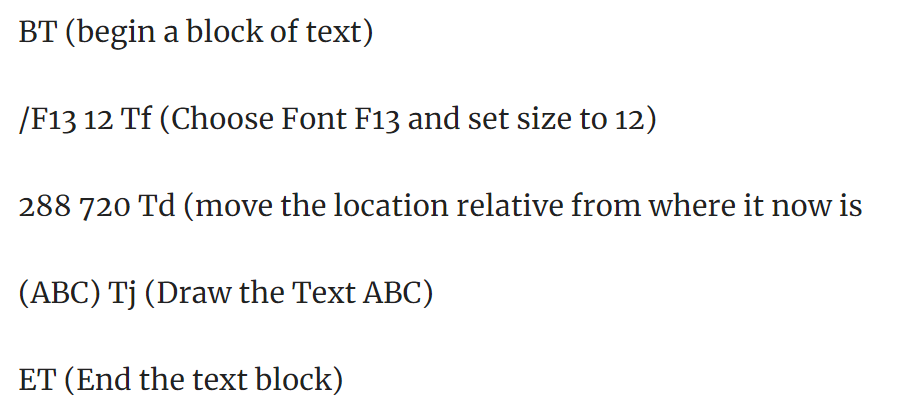

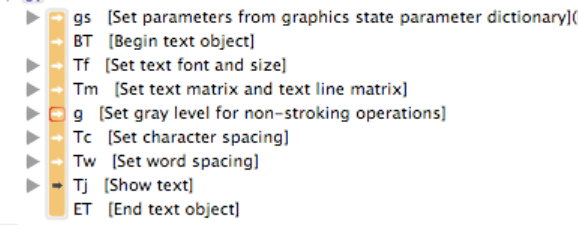

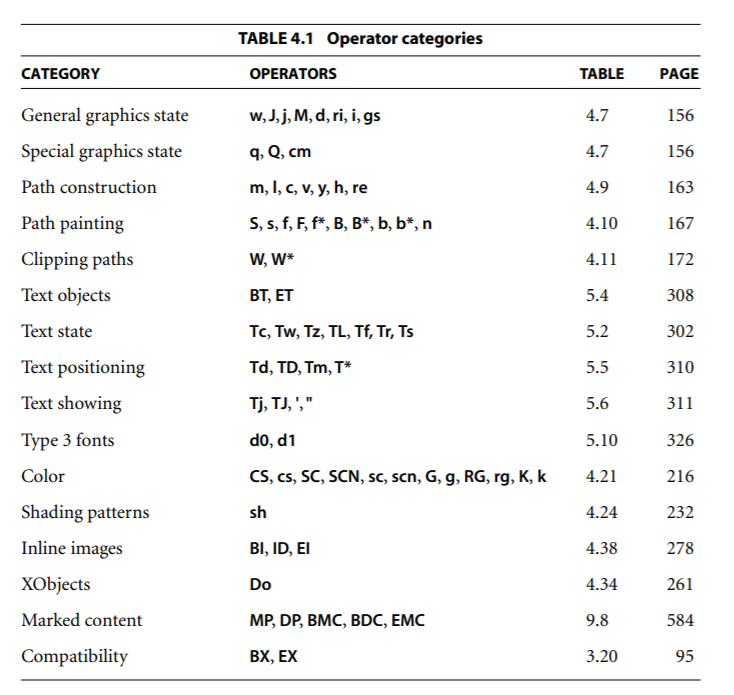

In [ ]:
#[q, cm, m, l],

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''
#import PyPDF2
#ls2=[' q ',' cm ','Q']
ls2=['Q']
with open('annual-report-2017.pdf', 'rb') as pdf_file:
  pdf_reader = PyPDF2.PdfFileReader(pdf_file)
  total=pdf_reader.pages
  for pages in range(0,len(total)-1):
    try:
      b=pdf_reader.getPage(pages)['/Contents'].getData()
      b=str(b)
      ball=list(b.split('\\n'))
      #if 're' in ball:
      #  continue
      checker=0
      for i in range(0,len(ball)-1):
        if ball[i]=='Q' and ball[i-1]=='S':
          continue
        for j in ls2:
          if j in ball[i]:
            checker=checker+1
      if checker>3:
        print(int(pages)+1,checker)
    except:
      pass


#pdffile = "/content/gdrive/My Drive/pdf/extracted3.pdf"
#doc = fitz.open(pdffile)
#doc.select(newls)
#doc.save("new_extracted.pdf")

'''

'\n#import PyPDF2\n#ls2=[\' q \',\' cm \',\'Q\']\nls2=[\'Q\']\nwith open(\'annual-report-2017.pdf\', \'rb\') as pdf_file:\n  pdf_reader = PyPDF2.PdfFileReader(pdf_file)\n  total=pdf_reader.pages\n  for pages in range(0,len(total)-1):\n    try:\n      b=pdf_reader.getPage(pages)[\'/Contents\'].getData()\n      b=str(b)\n      ball=list(b.split(\'\\n\'))\n      #if \'re\' in ball:\n      #  continue\n      checker=0\n      for i in range(0,len(ball)-1):\n        if ball[i]==\'Q\' and ball[i-1]==\'S\':\n          continue\n        for j in ls2:\n          if j in ball[i]:\n            checker=checker+1\n      if checker>3:\n        print(int(pages)+1,checker)\n    except:\n      pass\n\n\n#pdffile = "/content/gdrive/My Drive/pdf/extracted3.pdf"\n#doc = fitz.open(pdffile)\n#doc.select(newls)\n#doc.save("new_extracted.pdf")\n\n'

Below is the required code from this notebook which is able to detect pages which have graphs

In [ ]:
#import PyPDF2
pdffile = 'infosys-ar-20.pdf'
ls2=['Q']
with open(pdffile,'rb') as pdf_file: # open pdf
  pdf_reader = PyPDF2.PdfFileReader(pdf_file)
  total=pdf_reader.pages # read pages
  page_list=[]
  for pages in range(0,len(total)-1): # render each page
    #print(pages)
    c=pdf_reader.getPage(pages)['/Contents'] # if nested add page and proceed.
    if len(c)>1:
      page_list.append(pages)
      #print('Page no.',int(pages)+1,'tags found : hidden')
      continue
    b=pdf_reader.getPage(pages)['/Contents'].getData() # if not nested view stream file and check for 'Q'
    b=str(b)
    ball=list(b.split('\\n'))
    checker=0
    for i in range(0,len(ball)-1):
      if ball[i]=='Q' and ball[i-1]=='S': # remove tables if detected
        continue
      for j in ls2:
        if j in ball[i]:
          checker=checker+1
    if checker>3: # count of 'Q' should be greater than 3
      page_list.append(pages)
      #print('Page no.',int(pages)+1,', tags found:',checker)
doc = fitz.open(pdffile)
doc.select(page_list)
doc.save('Graphs_and_Charts ' + pdffile)   # save only required pages
print('total pages found:' ,len(page_list))

total pages found: 56
